# The size of character parts from largest to smallest

This notebook demonstrates analysing spoken part size of characters from a set of Shakespear plays with the help of <ins>SIA API</ins>.

_@Hugh, some explaination about the purpose of doing this experiment_

Firstly, a number of dependency modules are imported here.

- `requests`: is used for sending requests to the SIA API.
- `matplotlib.pyplot`: we use the Matplotlib to create the chart based on the results from the SIA API.
- `IPython.display`: is used for rendering the results from the SIA API as HTML tables.

In [1]:
import requests
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Next, we set up the API endpoint here. In this example, we use the <ins>Word Frequencies API</ins>.

In [2]:
request_url = "https://sia.ardc-hdcl-sia-iaw.cloud.edu.au/api/v1/word-frequencies"

In order to use the API, an API key is requried to authenticate the requests. The API key must be specified in a custom HTTP header `X-API-KEY` and sent along with every request.

You should use your own API keys for your own notebooks and always keep your keys confidential. Read more about <ins>how to create API keys</ins> in SIA. 

In [3]:
api_key = "255446bcdde7ca9fe776258d09e8411bbb8d1cade2ebd6aba440f80f6817c3fd"

Then, we start to prepare the request data which we can send to the Word Frequencies API. In this example, we are going to use a text set containing 20 Shakespear plays which has been already uploaded in the SIA platform. Instead of passing the actual text contents to the API, we can tell the API to use one of the texts or text sets from SIA by specifying its ID.

The URL of a text/text set page from <ins>SIA Application</ins> indicates the ID of that text/text set. For example:

```
https://sia.ardc-hdcl-sia-iaw.cloud.edu.au/text-sets/86
```

In this case, the ID of the "20 Shakespear plays" text set is `86`.

We will also pass serveral word frequecies options to the Word Frequencies API. These options are:

- `segmentByCharacter`: We will segment these plays by characters.
- `blockMethod`: We set the block method to `0`(By text), which segments play characters in the scope of each text.
- `excludeWords`: We are excluding some common punctuation marks from our analysis.

To view more details about options of Word Frequencies API, read the <ins>API documentation</ins>.

_@Hugh: more explainations about these options may be specified here_

In [4]:
request_data = {
    'textSet': 86,
    'option': {
        'segmentByCharacter': True,  #Segment by character
        'blockMethod' : 0,           #Segment by text
        'excludeWords': ["[","\\", "]", "_", "`", "!", "\"", "#", "%", "'", "(", ")", "+", ",", "-", "–", ".", "/", ":", ";", "{", "|", "}", "=", "~", "?" ],
    }
}

The SIA API accept JSON as the request data. Here we have constructed a Python dictionary object with the text set identifier and the word frequencies options. Next we are going to put all things together and use the [Requests](https://requests.readthedocs.io/en/latest/) module to send the request to the SIA API.

In [5]:
# Make API request
response = requests.post(request_url, json=request_data, headers={"X-API-KEY": api_key}, timeout=1200)

We have specified the API endpoint, request data we defined earlier and the `X-API-KEY` HTTP header for the API request and received the response. Please note that the API call can take serveral minutes to finish based on the size of the text or text set. Therefore, we have set the request timeout to `1200` seconds.

Before we start unpacking the response data, we want to make sure the API call was successful by checking the HTTP response code. Read the <ins>API documentation</ins> for all error codes.

In [6]:
print(f"{response.status_code} {response.reason}")
assert response.status_code == 200
response_data = response.json()

200 OK


Now, we have the response data ready from Word Frequencies API. We firstly want to list all characters from these plays in a table and sort them from the highest spoken part size to the lowest. We are going to unpack the response data and extract the information related to our experiment. Read more about the <ins>response data</ins> of Word Frequencies API.

In [7]:
# Create a dictionary to hold word counts from all characters.
character_word_counts = {}
for block in response_data['blocks']:
    character_word_counts[block['name']] = block['size']

# Sort by word count.
character_word_counts = dict(sorted(character_word_counts.items(), key=lambda item: item[1], reverse=True)) # Python 3.7+

We have created a dictionary which uses character names as keys and spoken part size as values. Then we sorted the dictionary by the spoken part size from highest to lowest (Note that sorting dictionary is only supported in Python 3.7+. If you are using order versions of Python, you might need to use `OrderedDict` instead).

The next step is to generate the HTML markups based on the dictionary we created and render it.

In [8]:
# Table dispaly
html = '<div style="overflow: auto; max-height: 500px; margin-top: 40px;"><table border="1">'

# Add table header
html += '<tr><th>Rank</th><th>Character</th><th>Size</th></tr>'

# Add table rows
i = 0
for character_name, word_count in character_word_counts.items():
    i += 1
    html += f"<tr><td>{str(i)}</td><td>{character_name}</td><td>{str(word_count)}</td></tr>"

html += '</table></div>'

display(HTML(html))

Rank,Character,Size
1,"Hamlet Q2~Hamlet, Prince of Denmark, son of the late King Hamlet and of Gertrude (1)",11331
2,Richard III Q1~Duke of Gloucester/Richard III (1),8479
3,"Othello Q1~Iago, Othello's ancient (1)",8477
4,Henry V F~King Henry V (1),8363
5,Coriolanus~Caius Martius Coriolanus (1),6482
6,Antony and Cleopatra~Antony (1),6055
7,"Othello Q1~Othello, A noble Moor in the service of the Ventian state (1)",5974
8,1 Henry IV Q1~Sir John Falstaff (1),5604
9,King Lear Q1~Lear; King of Britain (1),5488
10,Macbeth~Macbeth (1),5484


Now we have created a 3-column table. Each cell in the "Character" column contains the play name and the character name from that play separated by tilde (`~`).

_@Hugh: more insights about the table can be described here_

Next, we are going to visualise these data in a scatter plot using the [Matplotlib](https://matplotlib.org/) library. Note that the plot will only show the top 640 characters.

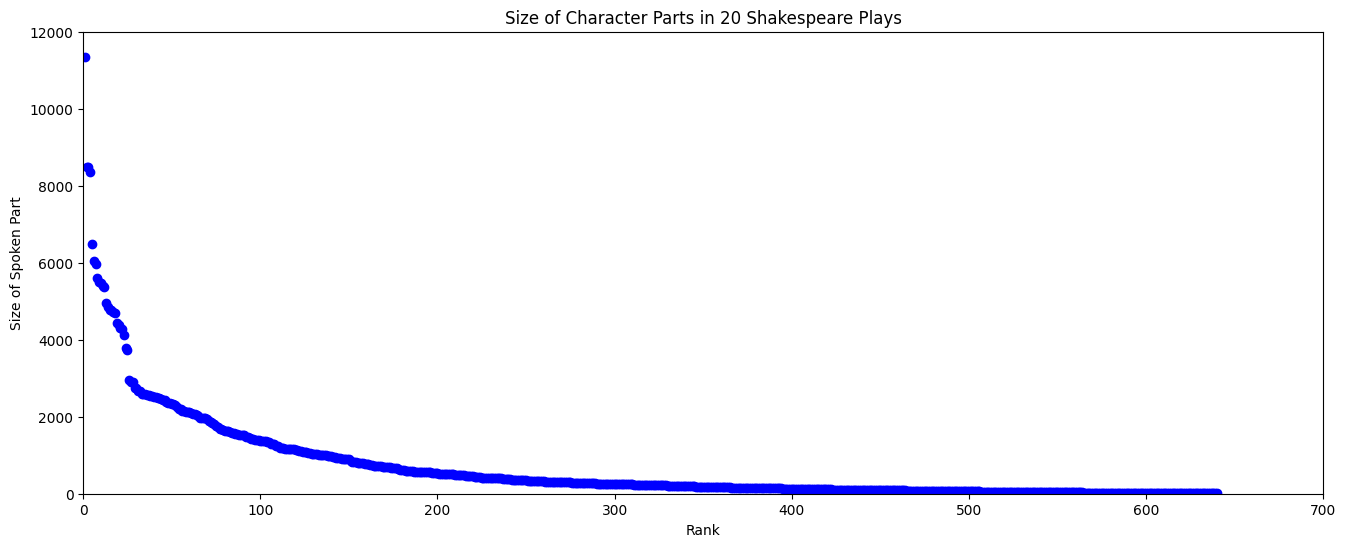

In [9]:
# Create the rank range from 1 to 640.
ranks = range(1, 641)

# Slice top 640 characters from the list. 
sizes = list(character_word_counts.values())[0:640]

# Scatterplot
plt.figure(figsize=(16, 6))
plt.scatter(ranks, sizes, c='blue')
plt.xticks(range(0, 701, 100))  # Set tick marks up to 700
plt.xlim([0, 700])  # Set x-axis limits up to 700
plt.ylim([0, 12000]) # Set x-axis limits up to 12000
plt.xlabel('Rank')
plt.ylabel('Size of Spoken Part')
plt.title('Size of Character Parts in 20 Shakespeare Plays')
plt.show()

_@Hugh: some insights about the chart_